# Preliminaries

Import necessary packages:

In [126]:
import pandas as pd
import seaborn as sns

# Apply default theme
sns.set_theme(style='whitegrid')

# Figures

### 1. Count of corporate bonds by sector

Load data from AWS: 

In [92]:
df = pd.read_csv("https://s3groupmorocco.s3.eu-central-1.amazonaws.com/data/CSPP_bonds_with_sectors.csv")
df.head()

,Unnamed: 0,MONTH,NCB,ISIN,ISSUER,MATURITY DATE,COUPON RATE,Match OpenPermID,SEARCH,Industry Group,Business Sector
0,0,2017/06,IT,XS1088274169,2i Rete Gas S.p.A.,16/07/2019,1.75,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
1,1,2017/06,IT,XS1088274672,2i Rete Gas S.p.A.,16/07/2024,3.0,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
2,2,2017/06,IT,XS1144492532,2i Rete Gas S.p.A.,02/01/2020,1.125,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
3,3,2017/06,IT,XS1571982468,2i Rete Gas S.p.A.,28/08/2026,1.75,https://permid.org/1-5000936840,2I|2I RETE|2I RETE GAS SPA|2i Rete Gas S.p.A.,Natural Gas Utilities,Utilities
4,4,2017/06,IT,XS0859920406,A2A S.p.A.,28/11/2019,4.5,https://permid.org/1-5000005309,A2A|A2A SPA|A2A SPA|A2A S.p.A.,Electric Utilities & IPPs,Utilities


How many industry groups?

In [93]:
df['Industry Group'].unique()

array(['Natural Gas Utilities', 'Electric Utilities & IPPs',
       'Machinery, Tools, Heavy Vehicles, Trains & Ships',
       'Transport Infrastructure', 'Multiline Utilities', 'Insurance',
       'Professional & Commercial Services', nan, 'Chemicals',
       'Aerospace & Defense', 'Residential & Commercial REITs',
       'Beverages', 'Oil & Gas',
       'Semiconductors & Semiconductor Equipment',
       'Real Estate Operations', 'Banking Services', 'Pharmaceuticals',
       'Media & Publishing', 'Construction & Engineering',
       'Software & IT Services', 'Telecommunications Services',
       'Investment Banking & Investment Services',
       'Automobiles & Auto Parts', 'Food & Tobacco',
       'Food & Drug Retailing', 'Passenger Transportation Services',
       'Freight&Logistics Services', 'Textiles & Apparel',
       'Oil & Gas Related Equipment and Services',
       'Homebuilding & Construction Supplies', 'Construction Materials',
       'Investment Holding Companies', 'Special

We will aggregate the industry groups (47 in total) present in this data to match those present in the greenhouse emissions data (8 in total). 

In [94]:
sectors = pd.read_csv("https://s3groupmorocco.s3.eu-central-1.amazonaws.com/data/greenhouse-gas-emissions-in-the-eu-28-1990-2018-by-sector.csv").columns[1:]
sectors

Index(['Energy supply', 'Transport', 'Industry', 'Agriculture',
       'Residential/commercial', 'International shipping',
       'International aviation', 'Waste'],
      dtype='object')

In [95]:
aggregation = {'Natural Gas Utilities':'Energy supply', 'Electric Utilities & IPPs':'Energy supply',
               'Machinery, Tools, Heavy Vehicles, Trains & Ships':'Industry', 'Transport Infrastructure':'Transport', 
               'Multiline Utilities':'Industry', 'Insurance':'Residential/commercial', 'Professional & Commercial Services':'Residential/commercial', 
               'Chemicals':'Industry', 'Aerospace & Defense':'Industry', 'Residential & Commercial REITs':'Residential/commercial',
               'Beverages':'Industry', 'Oil & Gas':'Energy supply', 'Semiconductors & Semiconductor Equipment':'Industry',
               'Real Estate Operations':'Residential/commercial', 'Banking Services':'Residential/commercial', 
               'Pharmaceuticals':'Industry', 'Media & Publishing':'Residential/commercial', 'Construction & Engineering':'Industry',
               'Software & IT Services':'Residential/commercial', 'Telecommunications Services':'Residential/commercial',
               'Investment Banking & Investment Services':'Residential/commercial', 'Automobiles & Auto Parts':'Industry', 
               'Food & Tobacco':'Agriculture', 'Food & Drug Retailing':'Agriculture', 'Passenger Transportation Services':'International aviation',
               'Freight&Logistics Services':'International shipping', 'Textiles & Apparel':'Industry', 'Oil & Gas Related Equipment and Services':'Energy supply',
               'Homebuilding & Construction Supplies':'Residential/commercial', 'Construction Materials':'Residential/commercial',
               'Investment Holding Companies':'Residential/commercial', 'Specialty Retailers':'Residential/commercial',
               'Hotels & Entertainment Services':'Residential/commercial', 'Water & Related Utilities':'Industry', 'Consumer Goods Conglomerates':'Industry', 
               'Household Goods':'Industry','Collective Investments':'Residential/commercial', 'Healthcare Equipment & Supplies':'Industry',
               'Paper & Forest Products':'Agriculture', 'Healthcare Providers & Services':'Residential/commercial', 'Communications & Networking':'Residential/commercial', 
               'Electronic Equipment & Parts':'Industry', 'Metals & Mining':'Industry', 'Containers & Packaging': 'Industry',
               'Financial Technology (Fintech) & Infrastructure':'Residential/commercial', 'Diversified Retail': 'Residential/commercial'}

df["Industry Group"].replace(aggregation, inplace=True)

Create new dataframe that contains the total number of bonds held by the ECB by sector:

In [131]:
df2 = df.groupby('Industry Group')['ISSUER'].count().add_suffix('').reset_index()
df2.sort_values('ISSUER', ascending = False, inplace = True)

Create a barchart:

Text(0.5, 1.0, 'Number of bonds held by ECB by sector')

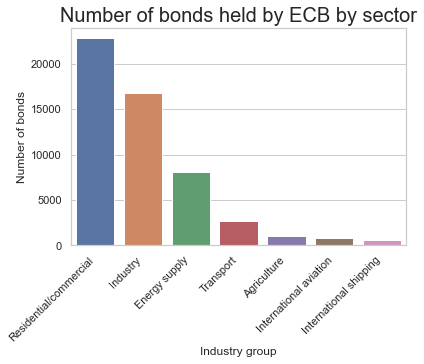

In [144]:
fig_1 = sns.barplot(x ='Industry Group', y ='ISSUER', data =df2)
fig_1.set_xticklabels(fig_1.get_xticklabels(), rotation=45, ha="right")
fig_1.set(xlabel = 'Industry group', ylabel = 'Number of bonds')
fig_1.axes.set_title("Number of bonds held by ECB by sector", fontsize=20)